These cells generate plots that look into the means, standard deviations, distribution shapes, and correlations of the data.

In [11]:
import pandas as pd

data = pd.read_csv("data/combined_data.csv")

colleges = data['College'].unique()
colleges = colleges[~pd.isna(colleges)]

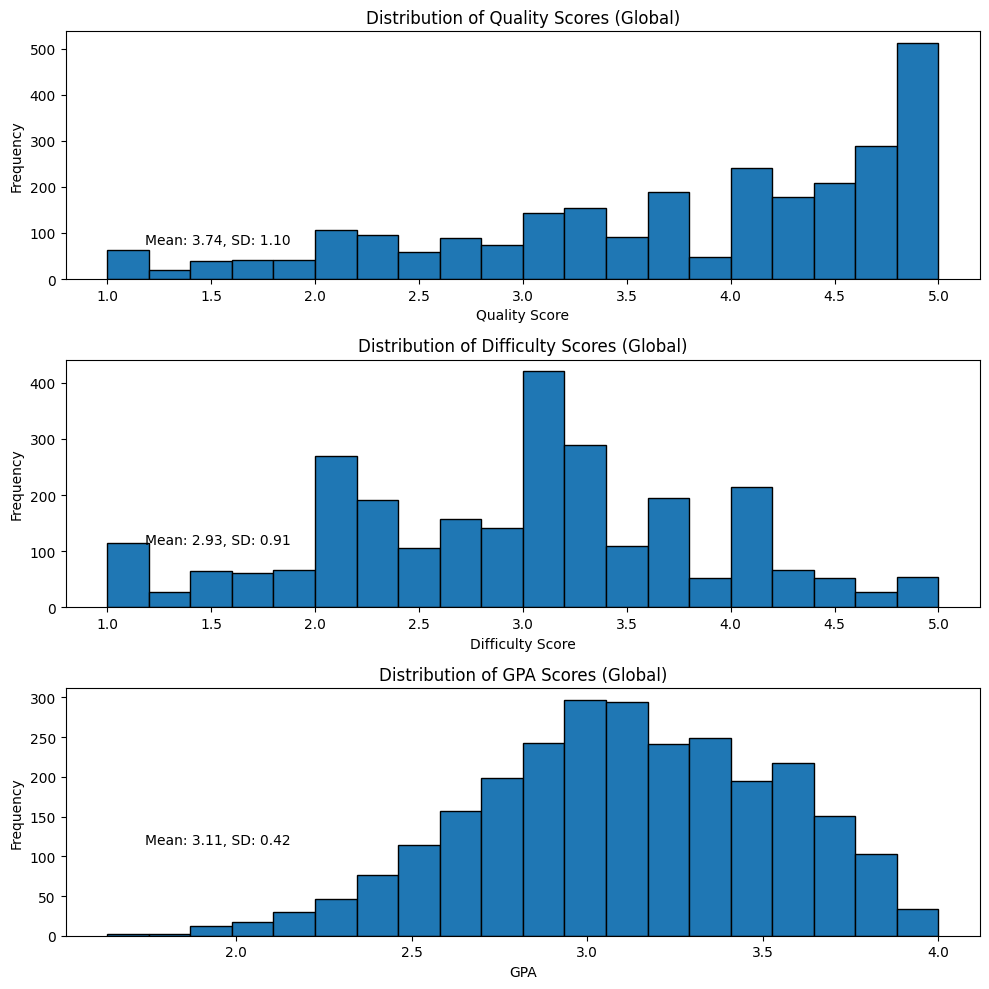

In [12]:
import matplotlib.pyplot as plt

# Function to plot distributions
def plot_distributions(data, title_suffix=''):
    quality_scores = data['Quality Score']
    difficulty_scores = data['Difficulty Score']
    gpa_scores = data['GPA']
    
    plt.figure(figsize=(10, 10))

    plt.subplot(3, 1, 1)
    plt.hist(quality_scores, bins=20, edgecolor='black')
    mean_quality = quality_scores.mean()
    std_quality = quality_scores.std()
    plt.title(f'Distribution of Quality Scores {title_suffix}')
    plt.xlabel('Quality Score')
    plt.ylabel('Frequency')
    plt.figtext(0.15, 0.75, f'Mean: {mean_quality:.2f}, SD: {std_quality:.2f}', fontsize=10)

    plt.subplot(3, 1, 2)
    plt.hist(difficulty_scores, bins=20, edgecolor='black')
    mean_difficulty = difficulty_scores.mean()
    std_difficulty = difficulty_scores.std()
    plt.title(f'Distribution of Difficulty Scores {title_suffix}')
    plt.xlabel('Difficulty Score')
    plt.ylabel('Frequency')
    plt.figtext(0.15, 0.45, f'Mean: {mean_difficulty:.2f}, SD: {std_difficulty:.2f}', fontsize=10)

    plt.subplot(3, 1, 3)
    plt.hist(gpa_scores, bins=20, edgecolor='black')
    mean_gpa = gpa_scores.mean()
    std_gpa = gpa_scores.std()
    plt.title(f'Distribution of GPA Scores {title_suffix}')
    plt.xlabel('GPA')
    plt.ylabel('Frequency')
    plt.figtext(0.15, 0.15, f'Mean: {mean_gpa:.2f}, SD: {std_gpa:.2f}', fontsize=10)

    plt.tight_layout()
    plt.show()

# Plot for global data
plot_distributions(data, title_suffix='(Global)')

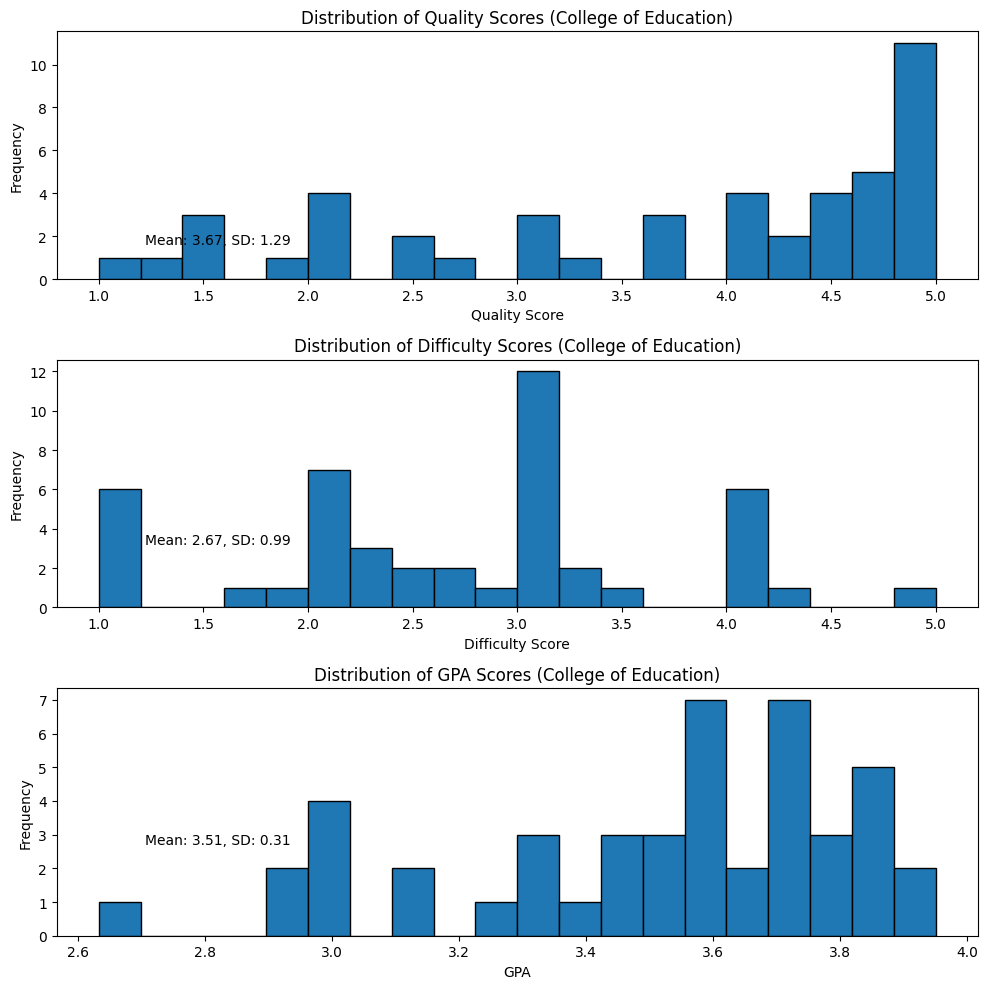

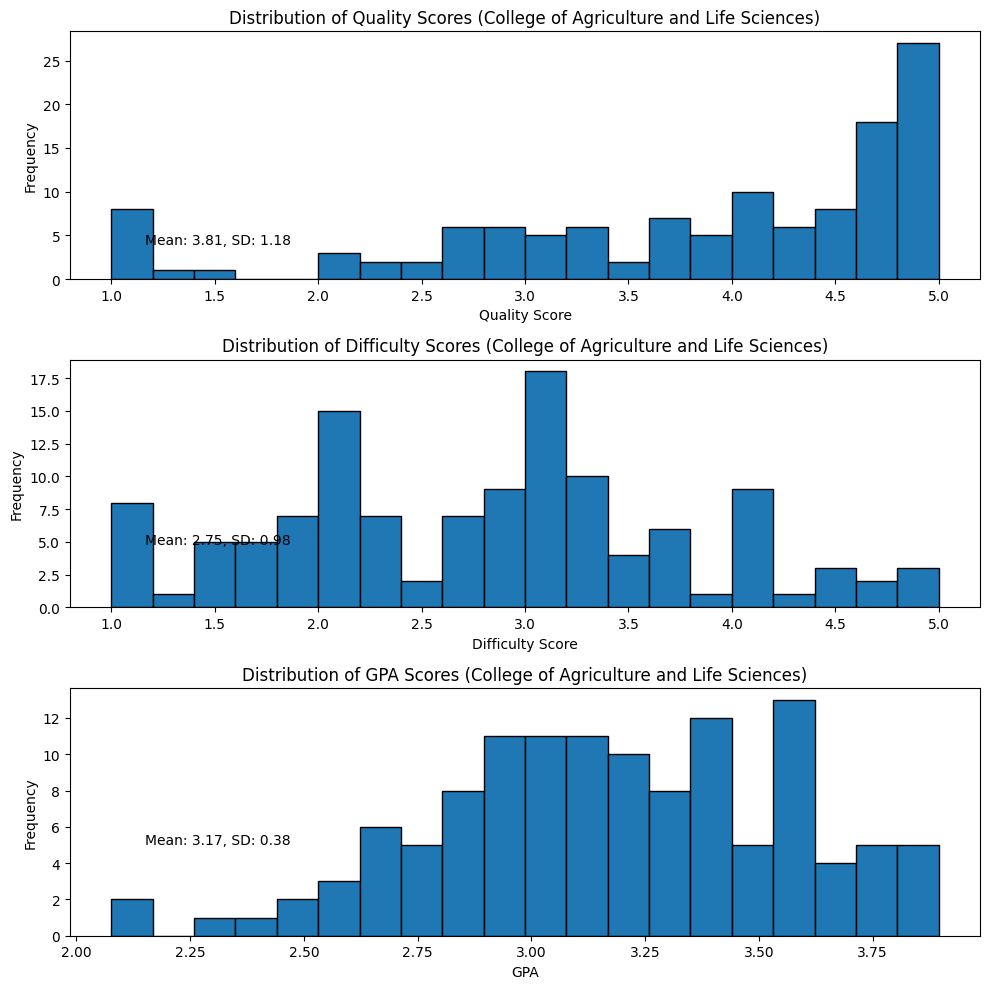

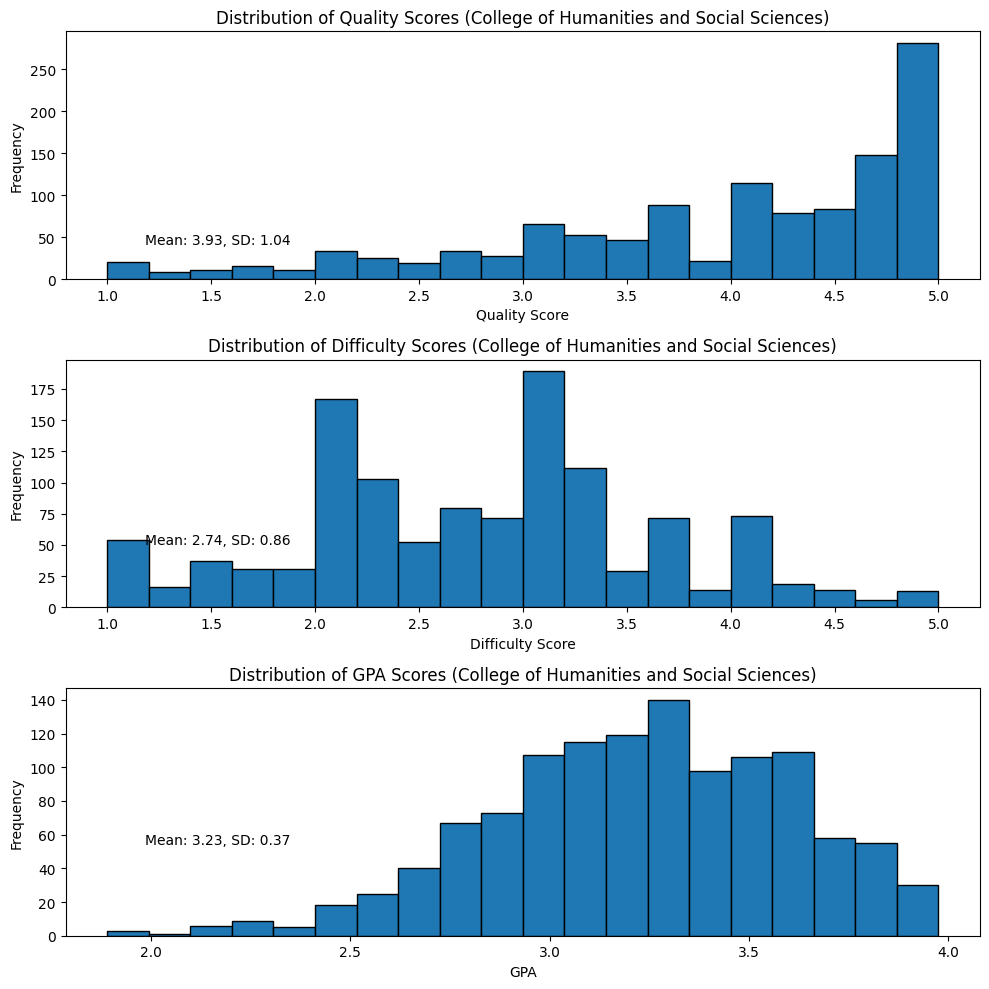

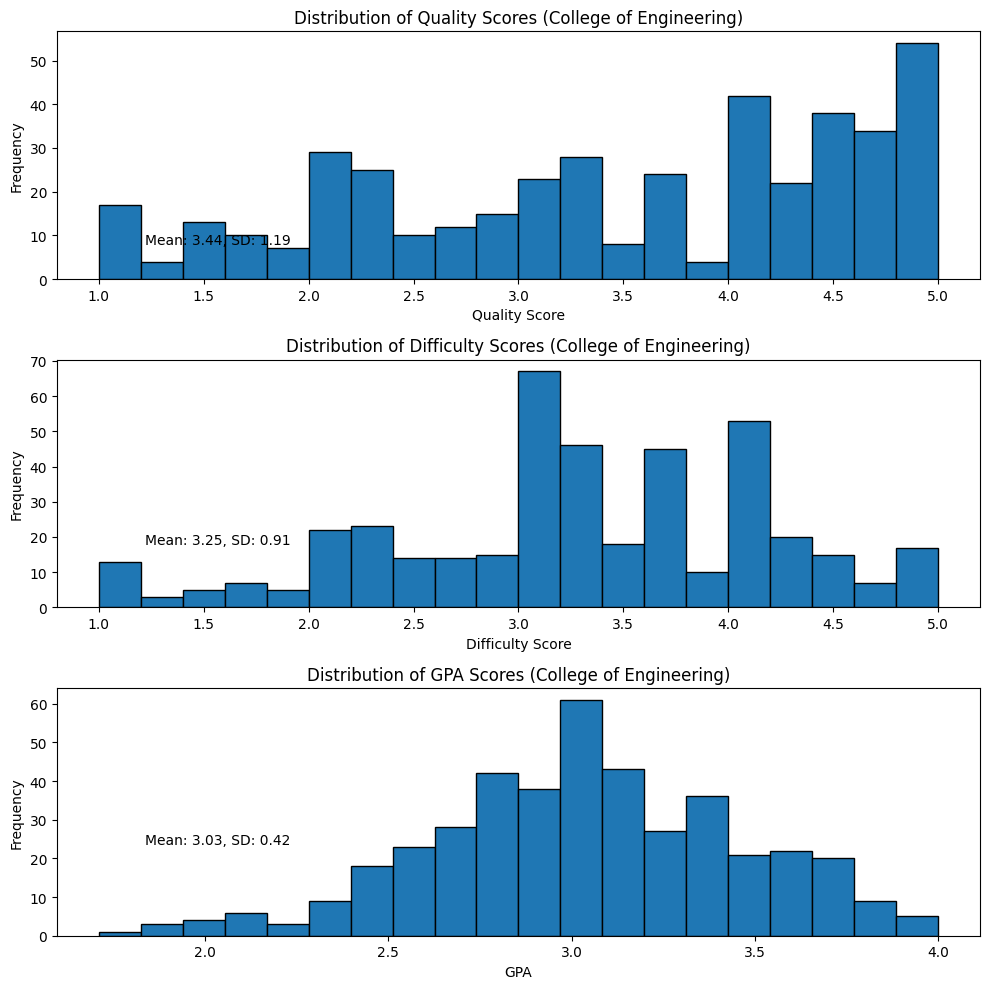

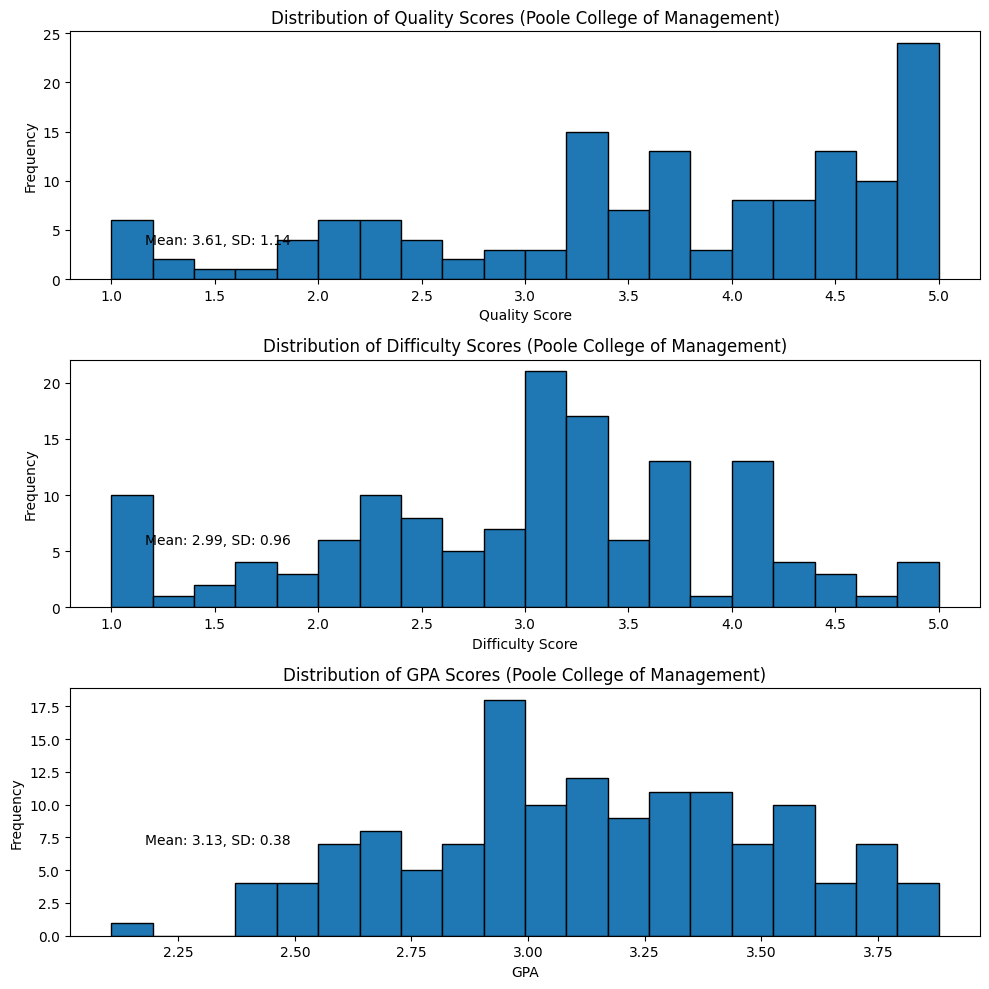

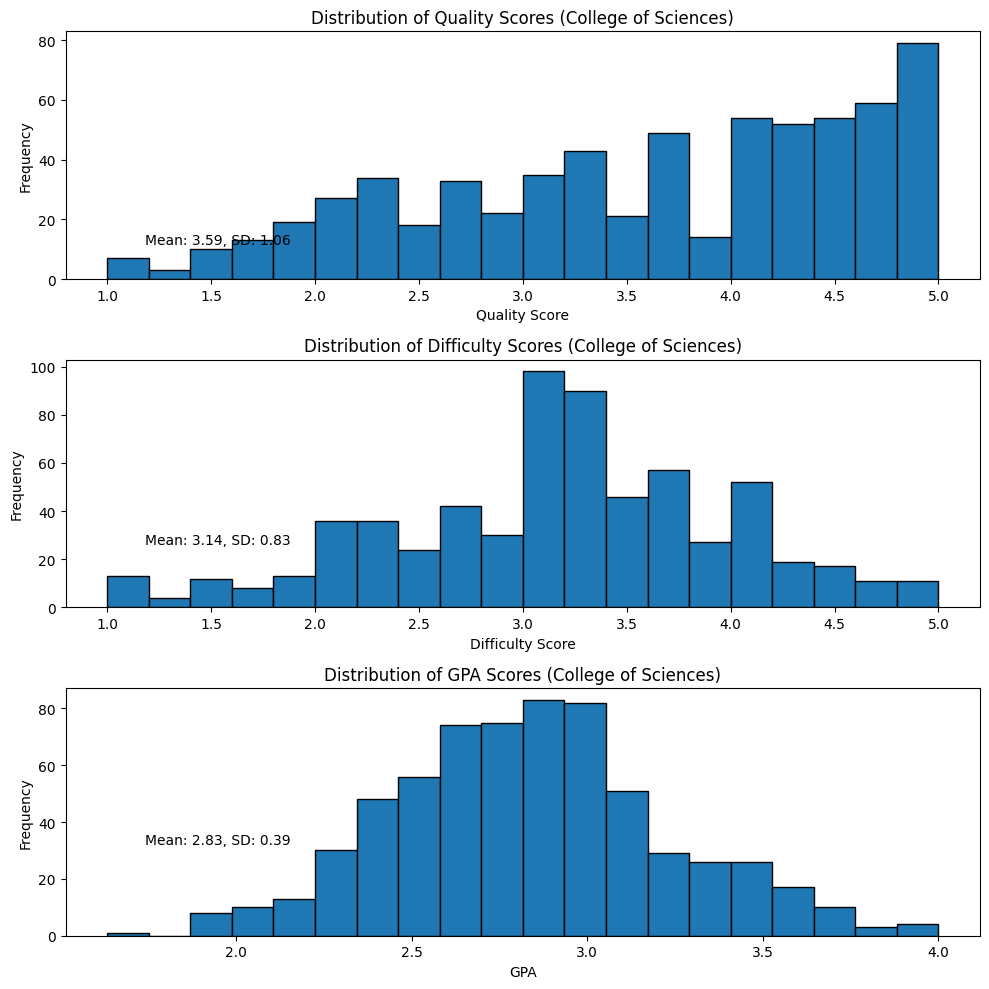

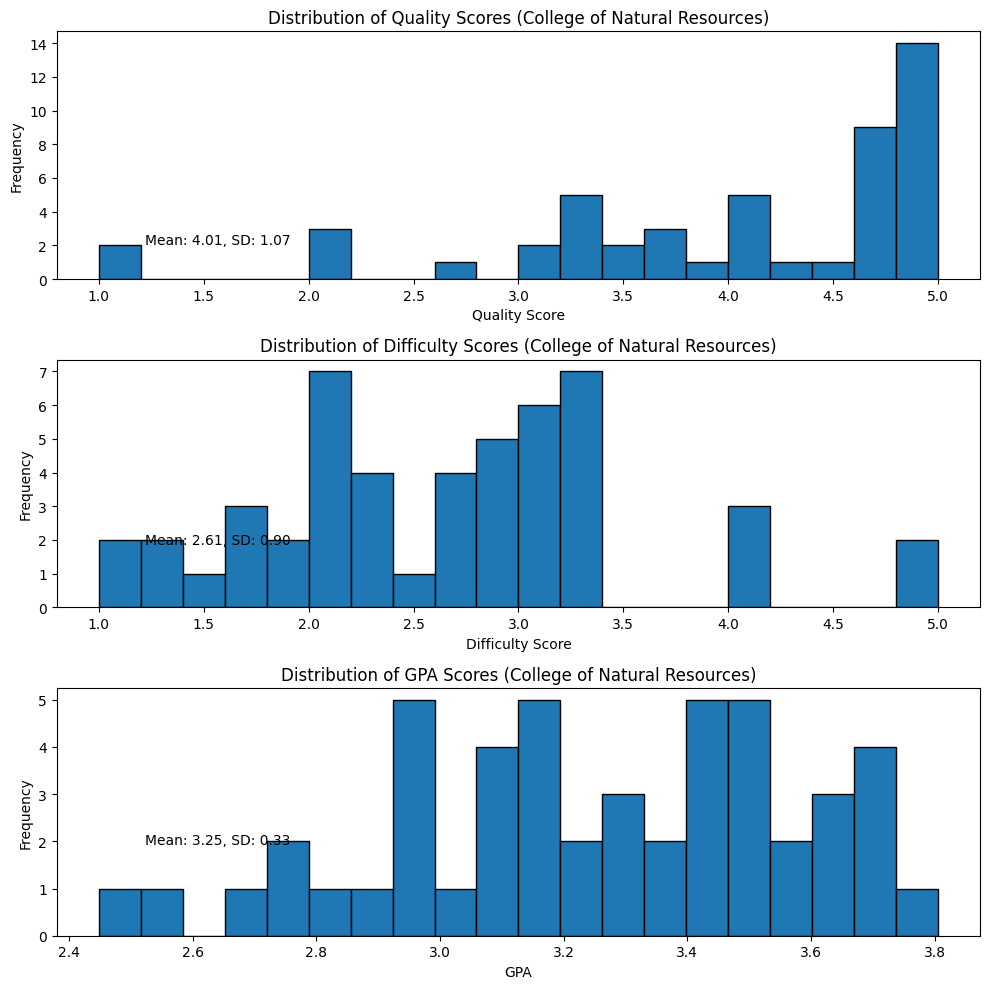

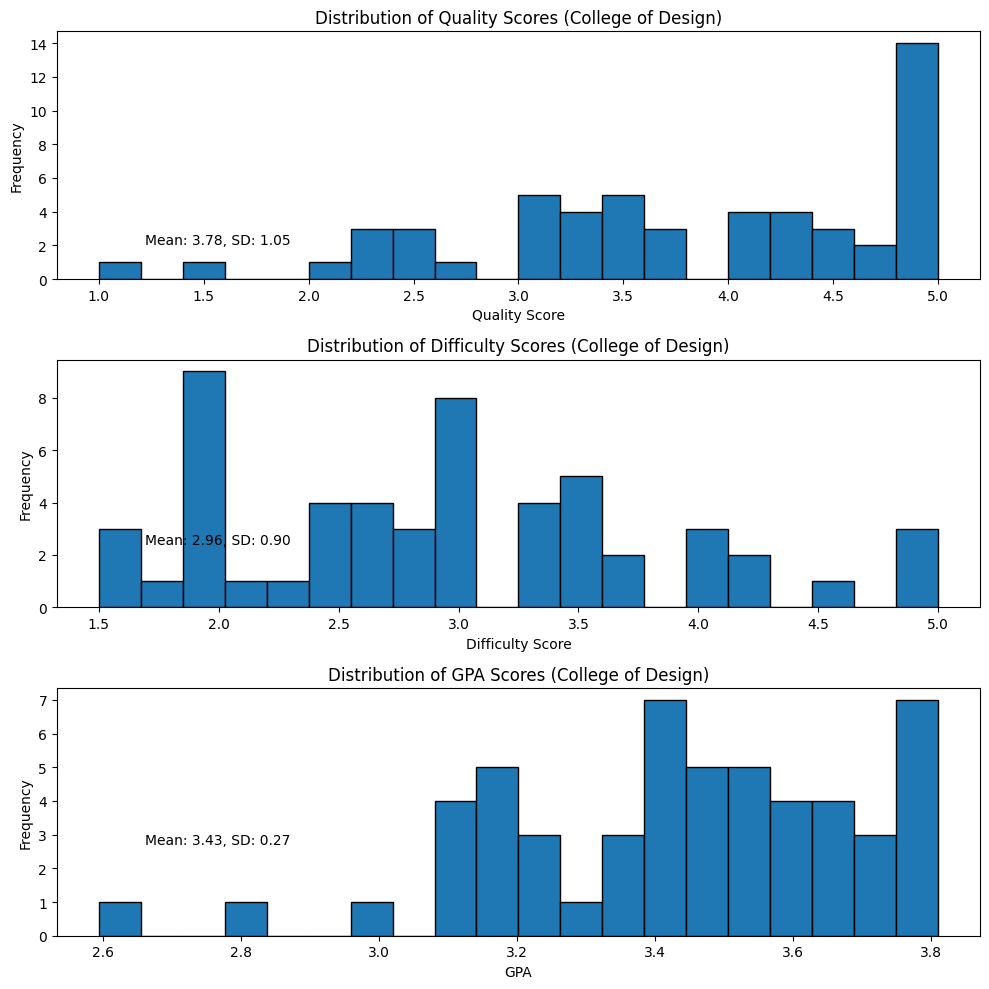

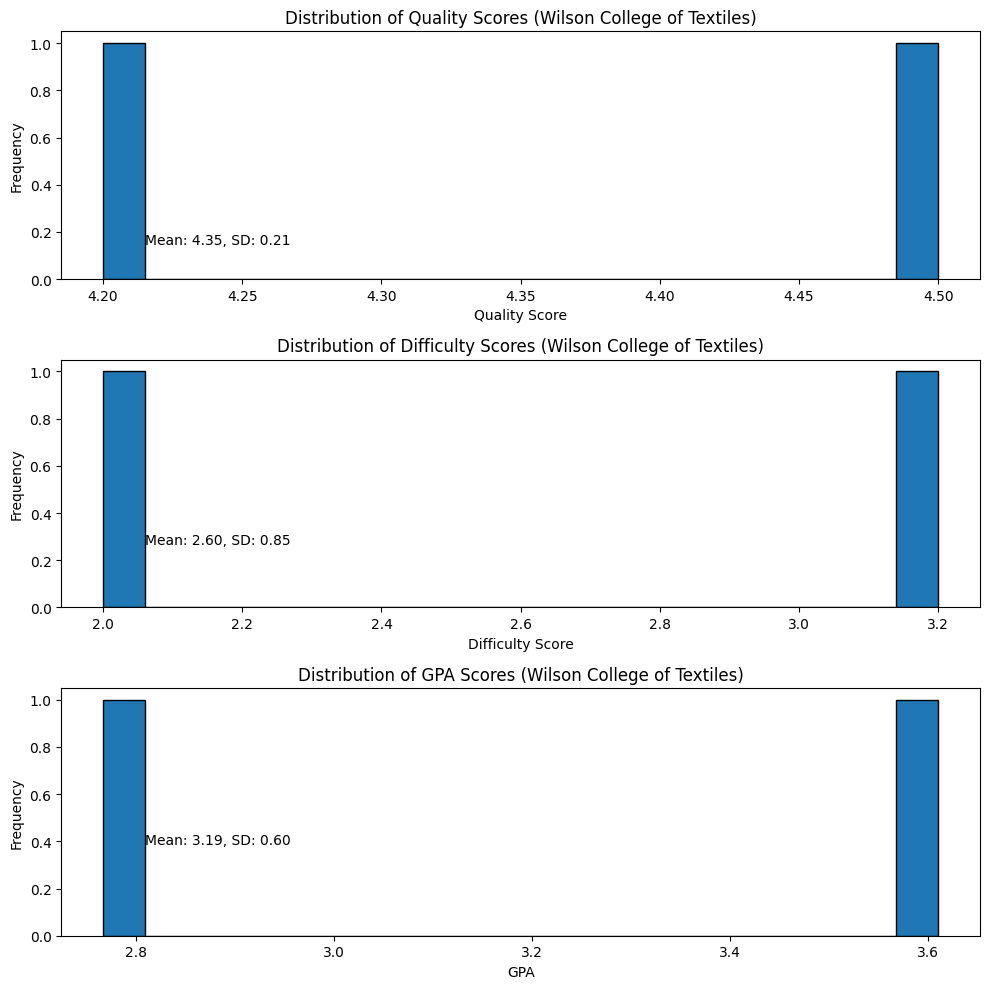

In [13]:
# Plot for each college
for college in colleges:
    college_data = data[data['College'] == college]
    plot_distributions(college_data, title_suffix=f'({college})')

Standard Deviation of Quality Scores: 1.100639175771637
Standard Deviation of Difficulty Scores: 0.9081926508571632
Standard Deviation of GPA Scores: 0.4213400112423321


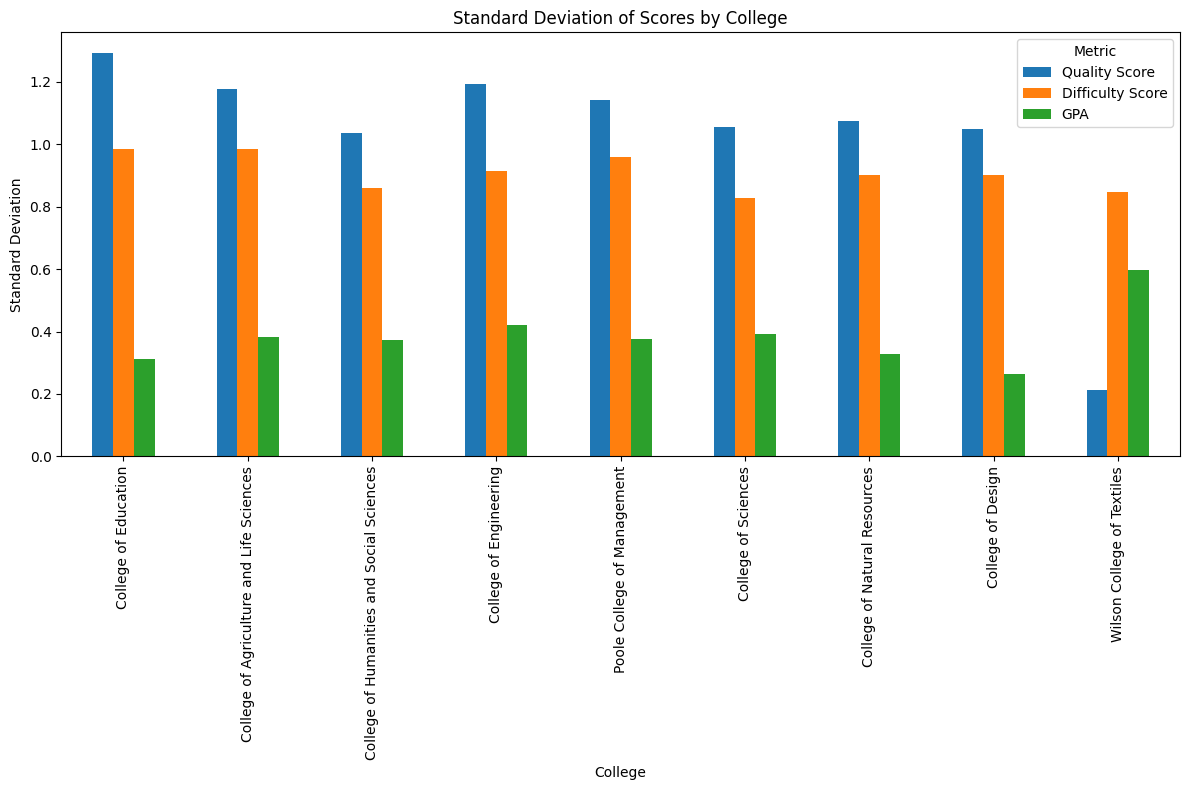

In [14]:

# Extract relevant columns
quality_scores = data['Quality Score']
difficulty_scores = data['Difficulty Score']
gpa_scores = data['GPA']

# Calculate standard deviations for entire data
std_quality = quality_scores.std()
std_difficulty = difficulty_scores.std()
std_gpa = gpa_scores.std()

# Display standard deviations for entire data
print('Standard Deviation of Quality Scores:', std_quality)
print('Standard Deviation of Difficulty Scores:', std_difficulty)
print('Standard Deviation of GPA Scores:', std_gpa)

# Calculate standard deviations for individual colleges
std_devs = {'College': [], 'Quality Score': [], 'Difficulty Score': [], 'GPA': []}

for college in colleges:
    college_data = data[data['College'] == college]
    std_quality_college = college_data['Quality Score'].std()
    std_difficulty_college = college_data['Difficulty Score'].std()
    std_gpa_college = college_data['GPA'].std()
    
    # Store standard deviations for each college
    std_devs['College'].append(college)
    std_devs['Quality Score'].append(std_quality_college)
    std_devs['Difficulty Score'].append(std_difficulty_college)
    std_devs['GPA'].append(std_gpa_college)
    
    # Display standard deviations for each college
    # print(f'College: {college}')
    # print(f'  Standard Deviation of Quality Scores: {std_quality_college}')
    # print(f'  Standard Deviation of Difficulty Scores: {std_difficulty_college}')
    # print(f'  Standard Deviation of GPA Scores: {std_gpa_college}')

# Convert to DataFrame for plotting
std_devs_df = pd.DataFrame(std_devs)

# Plot the standard deviations
std_devs_df.plot(x='College', kind='bar', figsize=(12, 8))
plt.title('Standard Deviation of Scores by College')
plt.xlabel('College')
plt.ylabel('Standard Deviation')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

Correlation between Quality and Difficulty: -0.5193924329171615
Correlation between Quality and GPA: 0.1588801779433249
Correlation between Difficulty and GPA: -0.538798186701573


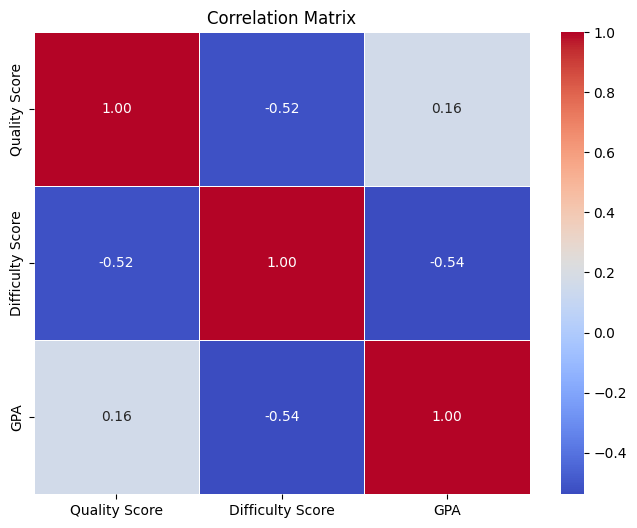

In [15]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Extract relevant columns
# quality_scores = data[data['College'] == 'Poole College of Management']['Quality Score']
# difficulty_scores = data['Difficulty Score']
# gpa_scores = data['GPA']
# print(len(quality_scores))

# Calculate correlation matrix
corr_matrix = data[data['College'] == 'Poole College of Management'][['Quality Score', 'Difficulty Score', 'GPA']].corr()

# Display correlation coefficients
print('Correlation between Quality and Difficulty:', corr_matrix.loc['Quality Score', 'Difficulty Score'])
print('Correlation between Quality and GPA:', corr_matrix.loc['Quality Score', 'GPA'])
print('Correlation between Difficulty and GPA:', corr_matrix.loc['Difficulty Score', 'GPA'])

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()